<a href="https://colab.research.google.com/github/ryrahman-arch/NGG_6050/blob/main/Power.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from statsmodels.stats.power import TTestIndPower
from math import sqrt



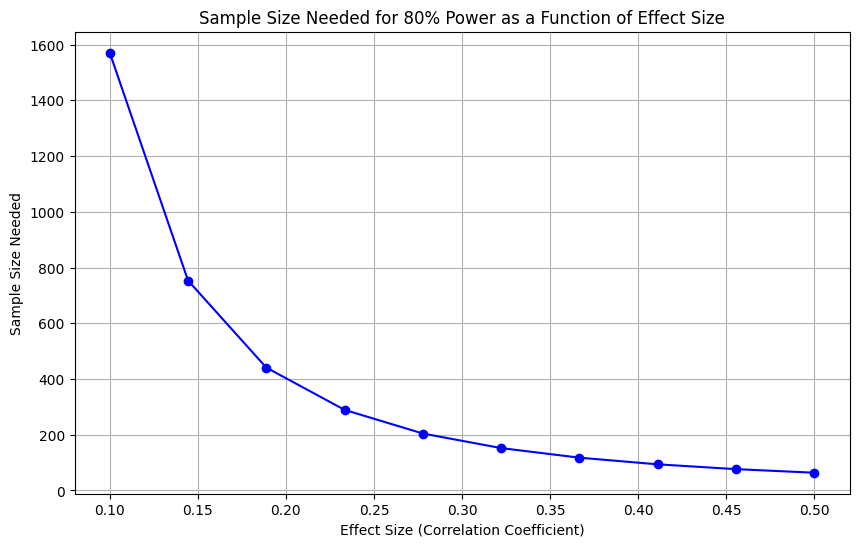

Mean correlation coefficient: -0.0001
Standard deviation of correlation coefficients: 0.0099


In [8]:
# Set the seed for reproducibility
np.random.seed(42)

# Parameters
n_samples = 10000  # Number of samples to simulate for each distribution
n_simulations = 10000  # Number of simulations to run

# Parameters for distributions
lambda_poisson = 5  # Mean rate (λ) for the Poisson distribution
mean_gaussian = 0  # Mean (μ) for the Gaussian distribution
std_dev_gaussian = 1  # Standard deviation (σ) for the Gaussian distribution

# Initialize arrays to store correlation coefficients
correlation_coefficients = np.zeros(n_simulations)

# Simulate data and compute correlation coefficients
for i in range(n_simulations):
    LC_spiking_data = np.random.poisson(lam=lambda_poisson, size=n_samples)
    pupil_data = np.random.normal(loc=mean_gaussian, scale=std_dev_gaussian, size=n_samples)
    correlation_matrix = np.corrcoef(LC_spiking_data, pupil_data)
    correlation_coefficients[i] = correlation_matrix[0, 1]

# Power analysis setup
power_analysis = TTestIndPower()
alpha = 0.05  # Significance level
power_target = 0.80  # Desired power

# Define effect sizes (correlation coefficients) for power analysis
effect_sizes = np.linspace(0.1, 0.5, 10)  # Example range of effect sizes from 0.1 to 0.5

# Calculate required sample sizes for each effect size
sample_sizes = []
for effect_size in effect_sizes:
    sample_size = power_analysis.solve_power(effect_size=effect_size, power=power_target, alpha=alpha, alternative='two-sided')
    sample_sizes.append(sample_size)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(effect_sizes, sample_sizes, marker='o', linestyle='-', color='b')
plt.xlabel('Effect Size (Correlation Coefficient)')
plt.ylabel('Sample Size Needed')
plt.title('Sample Size Needed for 80% Power as a Function of Effect Size')
plt.grid(True)
plt.show()

# Print summary statistics
print(f'Mean correlation coefficient: {np.mean(correlation_coefficients):.4f}')
print(f'Standard deviation of correlation coefficients: {np.std(correlation_coefficients):.4f}')

